In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('C:\\xampp\\htdocs\\Traffic Signal Recognition')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [3]:
cur_path

'C:\\xampp\\htdocs\\Traffic Signal Recognition'

In [4]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [5]:
data = np.array(data)
labels = np.array(labels)

In [6]:
# os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

In [7]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [10]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [11]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [12]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
epochs = 2
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/2
981/981 [==============================] - 64s 65ms/step - loss: 1.8387 - accuracy: 0.5327 - val_loss: 0.3911 - val_accuracy: 0.9042
Epoch 2/2
981/981 [==============================] - 62s 63ms/step - loss: 0.5374 - accuracy: 0.8465 - val_loss: 0.1515 - val_accuracy: 0.9662


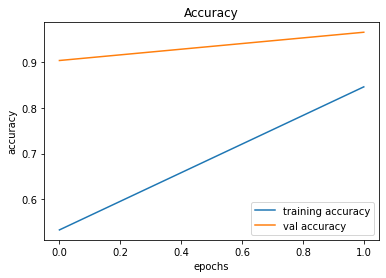

In [14]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

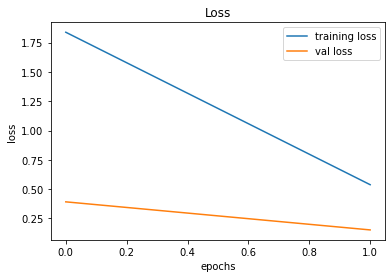

In [15]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [17]:
X_test, label = testing('Test.csv')

In [18]:
Y_pred =model.predict(X_test) 
Y_pred

395/395 [==============================] - 7s 16ms/step


array([[6.8848383e-14, 1.9228549e-10, 1.1857753e-11, ..., 4.3003315e-08,
        2.4786402e-09, 2.0101355e-11],
       [1.4591180e-07, 9.9999940e-01, 1.4657232e-07, ..., 1.7595393e-10,
        2.6065182e-14, 1.5829392e-11],
       [3.6545434e-22, 3.0371233e-18, 9.7291711e-20, ..., 1.0870876e-18,
        2.8416388e-21, 2.9528352e-26],
       ...,
       [5.8763581e-03, 1.1018442e-01, 6.9989026e-02, ..., 3.1020483e-02,
        2.9242041e-02, 1.8263195e-02],
       [8.3494626e-05, 2.0976677e-04, 1.9632740e-04, ..., 5.0265109e-04,
        1.9050038e-06, 3.0459242e-04],
       [4.5050256e-06, 4.3170174e-05, 1.6311315e-04, ..., 5.4539150e-06,
        3.6928961e-07, 1.0763691e-05]], dtype=float32)

In [19]:
model.save("./training/TSR.h5")

In [20]:
import os
os.chdir(r'C:\\xampp\\htdocs\\Traffic Signal Recognition')
from keras.models import load_model
model = load_model('C:\\xampp\\htdocs\\Traffic Signal Recognition\\training\\TSR.h5')

In [21]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [22]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
#     Y_pred = model.predict_classes(X_test) # the predict classes is removed from tensorflow in recent updates, so here we use the argmax function which works as same as that
    predict_x=model.predict(X_test)
    Y_pred = np.argmax(predict_x, axis = 1)
    classes_x=np.argmax(predict_x,axis=1)
    #Y_pred = model.predict(X_test)                                                                                                                                                                                                 
    #y_classes = Y_pred.argmax(axis=-1)
   #Y_pred = (model.predict(X_test) > 0.5).astype("int32")
    return image,Y_pred                                                                                                                                              


1/1 [==============================] - 0s 56ms/step
Predicted traffic sign is:  Speed limit (100km/h)


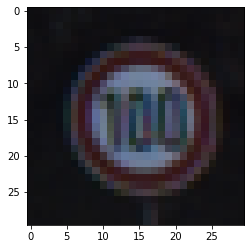

In [23]:
plot,prediction = test_on_img(r'C:\\xampp\\htdocs\\Traffic Signal Recognition\\Test\\00011.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
res = classes[a]
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 21ms/step
Predicted traffic sign is:  No passing


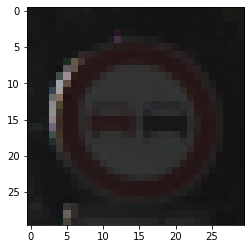

Result written in result.txt...


In [30]:
from PIL import Image

# set the path of the folder containing the images
folder_path = "C:\\xampp\\htdocs\\Traffic Signal Recognition\\Web Devp\\uploads"

# loop through all the files in the folder
for filename in os.listdir(folder_path):
    # check if the file is an image
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # open the image using PIL
        image_path = os.path.join(folder_path, filename)
#         print(image_path)
        # display the image
#         display(Image.open(image_path))
        break
        
plot,prediction = test_on_img(image_path)
s = [str(i) for i in prediction] 
a = int("".join(s)) 
res = classes[a]
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

with open(f"C:\\xampp\\htdocs\\Traffic Signal Recognition\\Web Devp\\result.txt", 'w', encoding='utf-8') as f:
    f.write(res)
    print("Result written in result.txt...")

os.remove(image_path)